In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import numpy as np
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
df = pd.read_json('../../data/cryptopunk_txn_history-2021-10-07.jsonl', lines=True)
print("DF Shape:", df.shape)
print("Column Names:", df.columns)
print("Unique Transaction Types:", df.txn_type.unique())
df

DF Shape: (167492, 12)
Column Names: Index(['txn_type', 'from', 'to', 'date', 'timestamp', 'source', 'eth',
       'punk_id', 'from_wallet_address', 'to_wallet_address', 'type',
       'accessories'],
      dtype='object')
Unique Transaction Types: ['Bid Withdrawn' 'Bid' 'Sold' 'Offered' 'Transfer' 'Claimed'
 'Offer Withdrawn' '(Wrap)' '(Unwrap)']


,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories
0,Bid Withdrawn,0xe73a1d,,2021-09-04,2021-09-04,larvalabs,321.00,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
1,Bid,0xe73a1d,,2021-09-01,2021-09-01,larvalabs,321.00,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
2,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.00,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
3,Bid,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.00,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
4,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,263.00,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
...,...,...,...,...,...,...,...,...,...,...,...,...
167487,Bid,0xa0a59c,,2017-07-03,2017-07-03,larvalabs,0.25,9999,None,None,[Female],"[Mohawk, Nerd Glasses]"
167488,Bid,0x717403,,2017-06-26,2017-06-26,larvalabs,0.20,9999,None,None,[Female],"[Mohawk, Nerd Glasses]"
167489,Bid,ddaavvee,,2017-06-23,2017-06-23,larvalabs,0.20,9999,None,None,[Female],"[Mohawk, Nerd Glasses]"
167490,Bid,0x5b098b,,2017-06-23,2017-06-23,larvalabs,0.15,9999,None,None,[Female],"[Mohawk, Nerd Glasses]"


In [3]:
df["accessory_count"] = df["accessories"].str.len()
# Get unique punk ids
df_claimed = df[df.txn_type == 'Claimed']
df_claimed.head()

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories,accessory_count
40,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]",3
103,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,1,None,None,[Male],"[Smile, Mohawk]",2
133,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,2,None,None,[Female],[Wild Hair],1
150,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,3,None,None,[Male],"[Wild Hair, Nerd Glasses, Pipe]",3
162,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,4,None,None,[Male],"[Big Shades, Wild Hair, Earring, Goat]",4


In [4]:
#df_sold = df[(df.txn_type == 'Sold') | (df.txn_type == 'Claimed')]
df_sold = df[(df.txn_type == 'Sold')]
df_sold.head()

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories,accessory_count
22,Sold,0xf5099e,0xe08c32,2018-11-30,2018-11-30,larvalabs,25.00,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]",3
30,Sold,0x00d7c9,0xa0a59c,2017-07-07,2017-07-07,larvalabs,1.60,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]",3
37,Sold,0xc352b5,0x00d7c9,2017-06-23,2017-06-23,larvalabs,0.98,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]",3
52,Sold,EliteCat…,0xcf6165,2020-11-30,2020-11-30,larvalabs,60.00,1,None,None,[Male],"[Smile, Mohawk]",2
78,Sold,0xf5099e,GoWest23,2019-04-06,2019-04-06,larvalabs,31.00,1,None,None,[Male],"[Smile, Mohawk]",2


In [5]:
# Find the mean sale price for a cryptopunk per ID
mean_sale = df_sold.groupby('punk_id')[["eth"]].mean().reset_index()
mean_sale = mean_sale.rename(columns={"eth": "mean_eth"})
mean_sale.mean_eth = mean_sale.mean_eth.fillna(0)
mean_sale

,punk_id,mean_eth
0,0,9.193333
1,1,30.473333
2,14,1.750000
3,33,0.510000
4,53,57.330000
...,...,...
6388,9982,142.000000
6389,9989,0.300000
6390,9990,12.255000
6391,9997,79.495000


In [6]:
# merge dataframes on punk_id
with_avg_sale = pd.merge(df_sold, mean_sale, on="punk_id")
df_punk_claimed = pd.merge(df_claimed, mean_sale, on="punk_id")

with_avg_sale.head()
df_punk_claimed.head()

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories,accessory_count,mean_eth
0,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]",3,9.193333
1,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,1,None,None,[Male],"[Smile, Mohawk]",2,30.473333
2,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,14,None,None,[Female],"[Pipe, Pilot Helmet, Hot Lipstick]",3,1.750000
3,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,33,None,None,[Male],[Peak Spike],1,0.510000
4,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,53,None,None,[Female],"[Big Shades, Straight Hair]",2,57.330000


In [7]:
# Conceptualize the "accessories" column as a 2D array
# Reducing its dimensions from 2 to 1 would allow us to apply value_counts
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

# Keep one unique punk_id column so that we can accurately count total accessories
unique_punk_id = df.drop_duplicates(subset=['punk_id'])

type_counts = to_1D(unique_punk_id["accessories"])
acc_type_counts = pd.DataFrame({'index':type_counts.index, 'accessory_type':type_counts.values})

print("Total Number of Accessories (shoud match above):", acc_type_counts.shape[0])
acc_type_counts.head()

Total Number of Accessories (shoud match above): 27539


,index,accessory_type
0,0,Green Eye Shadow
1,1,Earring
2,2,Blonde Bob
3,3,Smile
4,4,Mohawk


In [8]:
def under_100(row):
    val = 0
    if row < 100:
        val = 1
    return val

# Create dataframe that has accessory type and the count for all NFTs
acc_counts = pd.DataFrame(to_1D(unique_punk_id["accessories"]).value_counts()).reset_index()
acc_counts = acc_counts.rename(columns={0:'acc_count', 'index':'accessory_type'})
acc_counts = acc_counts.sort_values(by=['acc_count'], ascending=True)
acc_counts['percent_count'] = round(100 * (acc_counts['acc_count'] / acc_counts['acc_count'].sum()), 4)
print(acc_counts)

     accessory_type  acc_count  percent_count
86           Beanie         44         0.1598
85           Choker         48         0.1743
84     Pilot Helmet         54         0.1961
83            Tiara         55         0.1997
82      Orange Side         68         0.2469
..              ...        ...            ...
4              Mole        644         2.3385
3   Purple Lipstick        655         2.3784
2      Hot Lipstick        696         2.5273
1         Cigarette        961         3.4896
0           Earring       2459         8.9292

[87 rows x 3 columns]


In [63]:
acc_counts

,accessory_type,acc_count,percent_count
86,Beanie,44,0.1598
85,Choker,48,0.1743
84,Pilot Helmet,54,0.1961
83,Tiara,55,0.1997
82,Orange Side,68,0.2469
...,...,...,...
4,Mole,644,2.3385
3,Purple Lipstick,655,2.3784
2,Hot Lipstick,696,2.5273
1,Cigarette,961,3.4896


In [9]:
acc_counts_dict = dict(zip(acc_counts.accessory_type, acc_counts.acc_count))
acc_pct_dict = dict(zip(acc_counts.accessory_type, acc_counts.percent_count))

print(acc_counts_dict)
print(acc_pct_dict)

{'Beanie': 44, 'Choker': 48, 'Pilot Helmet': 54, 'Tiara': 55, 'Orange Side': 68, 'Buck Teeth': 78, 'Welding Goggles': 86, 'Pigtails': 94, 'Pink With Hat': 95, 'Top Hat': 115, 'Spots': 124, 'Rosy Cheeks': 128, 'Blonde Short': 129, 'Wild White Hair': 136, 'Cowboy Hat': 142, 'Straight Hair Blonde': 144, 'Wild Blonde': 144, 'Big Beard': 146, 'Half Shaved': 147, 'Red Mohawk': 147, 'Blonde Bob': 147, 'Vampire Hair': 147, 'Straight Hair Dark': 148, 'Clown Hair Green': 148, 'Straight Hair': 151, 'Silver Chain': 156, 'Dark Hair': 157, 'Purple Hair': 165, 'Gold Chain': 169, 'Medical Mask': 175, 'Tassle Hat': 178, 'Fedora': 186, 'Police Cap': 203, 'Clown Nose': 212, 'Smile': 238, 'Cap Forward': 254, 'Hoodie': 259, 'Front Beard Dark': 260, 'Frown': 261, 'Purple Eye Shadow': 262, 'Handlebars': 263, 'Blue Eye Shadow': 266, 'Green Eye Shadow': 271, 'Vape': 272, 'Front Beard': 273, 'Chinstrap': 282, '3D Glasses': 286, 'Luxurious Beard': 286, 'Mustache': 288, 'Normal Beard Black': 289, 'Normal Beard': 

In [10]:
def create_count_list(row):
    value_list = []
    for acc in row:
        value_list.append(acc_counts_dict[acc])
    
    return value_list

def create_count(row):
    if row != '':
        value = acc_counts_dict[row]
    else:
        value = None
        
    return value

def create_pct_list(row):
    value_list = []
    for acc in row:
        value_list.append(acc_pct_dict[acc])
    
    return value_list

def remove_list(row):
    value = row[0]
    return value

def remove_list_acc(row):
    value = ','.join(row)
    return value

In [69]:
mean_sale

,punk_id,mean_eth
0,0,9.193333
1,1,30.473333
2,14,1.750000
3,33,0.510000
4,53,57.330000
...,...,...
6388,9982,142.000000
6389,9989,0.300000
6390,9990,12.255000
6391,9997,79.495000


In [71]:
df["accessory_count"] = df["accessories"].str.len()
# Get unique punk ids
df_claimed = df[df.txn_type == 'Claimed']
df_claimed.head()

#df_sold = df[(df.txn_type == 'Sold') | (df.txn_type == 'Claimed')] # uncomment this to include punks that were not sold
df_sold = df[(df.txn_type == 'Sold')]
df_sold.head()

# Find the mean sale price for a cryptopunk per ID
mean_sale = df_sold.groupby('punk_id')[["eth"]].mean().reset_index()
mean_sale = mean_sale.rename(columns={"eth": "mean_eth"})
mean_sale.mean_eth = mean_sale.mean_eth.fillna(0)
mean_sale

# merge dataframe to add in average sale price, on punk_id
with_avg_sale = pd.merge(df_sold, mean_sale, on="punk_id")
df_counts = df_claimed.copy()
df_punk_claimed = pd.merge(df_claimed, mean_sale, on="punk_id")

# Format the type and accessory columns (remove the brackets)
#with_avg_sale['accessories_percents'] = with_avg_sale.accessories.apply(create_pct_list)
with_avg_sale['type_formatted'] = with_avg_sale['type'].apply(remove_list)
with_avg_sale['accessories_formatted'] = with_avg_sale.accessories.apply(remove_list_acc)
df_punk_claimed['type_formatted'] = df_punk_claimed['type'].apply(remove_list)
df_punk_claimed['accessories_formatted'] = df_punk_claimed.accessories.apply(remove_list_acc)
df_counts['type_formatted'] = df_counts['type'].apply(remove_list)
df_counts['accessories_formatted'] = df_counts.accessories.apply(remove_list_acc)

# Create the top 20 sales dataframe BEFORE the split accessories
df_sales = df_punk_claimed.copy() # since we don't want duplicates
df_sales_top1 = df_sales[df_sales["mean_eth"] > 170] # top 1% - value taken from describe() function

# Split the accessories and assign the values
with_avg_sale['accessories_split'] = with_avg_sale['accessories']
with_avg_sale = with_avg_sale.explode('accessories_split').fillna('')
with_avg_sale['accessories_counts'] = with_avg_sale.accessories_split.apply(create_count)

df_punk_claimed['accessories_split'] = df_punk_claimed['accessories']
df_punk_claimed = df_punk_claimed.explode('accessories_split').fillna('')
df_punk_claimed['accessories_counts'] = df_punk_claimed.accessories_split.apply(create_count)

df_counts['accessories_split'] = df_counts['accessories']
df_counts = df_counts.explode('accessories_split').fillna('')
df_counts['accessories_counts'] = df_counts.accessories_split.apply(create_count)

# Assign the type values
type_value = df_punk_claimed.groupby(by=['type_formatted'], as_index=False)[['type']].count()
type_value = type_value.rename(columns={'type': 'type_counts'})

# Merge the claimed dataframe with the type values (Only 10,000 rows)
df_punks = pd.merge(df_punk_claimed, type_value, on="type_formatted")
df_counts = pd.merge(df_counts, type_value, on="type_formatted")

# generate the tf-idf columns
df_punks["tf"] = 1 / df_punks["accessory_count"]
df_punks["idf"] = np.log10(10_000 / df_punks["accessories_counts"])
df_punks["tf-idf"] = df_punks["tf"] * df_punks["idf"]

df_counts["tf"] = 1 / df_counts["accessory_count"]
df_counts["idf"] = np.log10(10_000 / df_counts["accessories_counts"])
df_counts["tf-idf"] = df_counts["tf"] * df_counts["idf"]

# generate the tf-idf sums
tf_idf_sum = df_punks.groupby("punk_id")[["tf-idf"]].sum().reset_index()
tf_idf_sum = tf_idf_sum.rename(columns={"tf-idf": "tf-idf_sum"})

# merge the punks and the new tf-idf sum
df_punks = pd.merge(df_punks, tf_idf_sum, on="punk_id")

# do the same for df_counts
tf_idf_sum = df_counts.groupby("punk_id")[["tf-idf"]].sum().reset_index()
tf_idf_sum = tf_idf_sum.rename(columns={"tf-idf": "tf-idf_sum"})
df_counts = pd.merge(df_counts, tf_idf_sum, on="punk_id")

# using df sales from above
# Create the top sales dataframe BEFORE the split accessories
df_sales_tf_idf = pd.merge(df_sales, tf_idf_sum, on="punk_id")
df_sales_top1 = df_sales_tf_idf[df_sales["mean_eth"] > 170] # top 1% - value taken from describe() function
df_sales_top5 = df_sales_tf_idf[df_sales["mean_eth"] > 100] # top 1% - value taken from describe() function
df_sales_top10 = df_sales_tf_idf[df_sales["mean_eth"] > 71]
df_sales_top20 = df_sales_tf_idf[df_sales["mean_eth"] > 45] # top 1% - value taken from describe() function
df_sales_top50 = df_sales_tf_idf[df_sales["mean_eth"] > 17] # top 1% - value taken from describe() function
df_sales_bottom5 = df_sales_tf_idf[df_sales["mean_eth"] <= 0.14] # top 1% - value taken from describe() function


df_punks

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,...,mean_eth,type_formatted,accessories_formatted,accessories_split,accessories_counts,type_counts,tf,idf,tf-idf,tf-idf_sum
0,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,0,,,...,9.193333,Female,"Green Eye Shadow,Earring,Blonde Bob",Green Eye Shadow,271.0,6243,0.333333,1.567031,0.522344,1.336318
1,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,0,,,...,9.193333,Female,"Green Eye Shadow,Earring,Blonde Bob",Earring,2459.0,6243,0.333333,0.609241,0.203080,1.336318
2,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,0,,,...,9.193333,Female,"Green Eye Shadow,Earring,Blonde Bob",Blonde Bob,147.0,6243,0.333333,1.832683,0.610894,1.336318
3,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,14,,,...,1.750000,Female,"Pipe,Pilot Helmet,Hot Lipstick",Pipe,317.0,6243,0.333333,1.498941,0.499647,1.641313
4,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,14,,,...,1.750000,Female,"Pipe,Pilot Helmet,Hot Lipstick",Pilot Helmet,54.0,6243,0.333333,2.267606,0.755869,1.641313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17852,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7523,,,...,8.000000,Alien,"Earring,Knitted Cap,Medical Mask",Knitted Cap,419.0,13,0.333333,1.377786,0.459262,1.247996
17853,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7523,,,...,8.000000,Alien,"Earring,Knitted Cap,Medical Mask",Medical Mask,175.0,13,0.333333,1.756962,0.585654,1.247996
17854,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7804,,,...,2106.000000,Alien,"Cap Forward,Pipe,Small Shades",Cap Forward,254.0,13,0.333333,1.595166,0.531722,1.505538
17855,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7804,,,...,2106.000000,Alien,"Cap Forward,Pipe,Small Shades",Pipe,317.0,13,0.333333,1.498941,0.499647,1.505538


In [39]:
df_sales_tf_idf

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories,accessory_count,mean_eth,type_formatted,accessories_formatted,tf-idf_sum
0,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]",3,9.193333,Female,"Green Eye Shadow,Earring,Blonde Bob",1.336318
1,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,1,None,None,[Male],"[Smile, Mohawk]",2,30.473333,Male,"Smile,Mohawk",1.489492
2,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,14,None,None,[Female],"[Pipe, Pilot Helmet, Hot Lipstick]",3,1.750000,Female,"Pipe,Pilot Helmet,Hot Lipstick",1.641313
3,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,33,None,None,[Male],[Peak Spike],1,0.510000,Male,Peak Spike,1.518557
4,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,53,None,None,[Female],"[Big Shades, Straight Hair]",2,57.330000,Female,"Big Shades,Straight Hair",1.546335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6388,Claimed,,shilpixe…,2017-06-23,2017-06-23,larvalabs,NaN,9982,None,None,[Female],"[Stringy Hair, VR, Earring]",3,142.000000,Female,"Stringy Hair,VR,Earring",1.140841
6389,Claimed,,Zieg,2017-06-23,2017-06-23,larvalabs,NaN,9989,None,None,[Female],"[Pilot Helmet, Hot Lipstick, Cigarette]",3,0.300000,Female,"Pilot Helmet,Hot Lipstick,Cigarette",1.480758
6390,Claimed,,0x00bd9f,2017-06-23,2017-06-23,larvalabs,NaN,9990,None,None,[Male],"[Horned Rim Glasses, Mohawk]",2,12.255000,Male,"Horned Rim Glasses,Mohawk",1.313604
6391,Claimed,,TJ2010,2017-06-23,2017-06-23,larvalabs,NaN,9997,None,None,[Zombie],"[Front Beard, Cap Forward]",2,79.495000,Zombie,"Front Beard,Cap Forward",1.579502


In [25]:
df_sales_top1

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories,accessory_count,mean_eth,type_formatted,accessories_formatted,tf-idf_sum
136,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,561,None,None,[Male],"[Top Hat, 3D Glasses]",2,198.500000,Male,"Top Hat,3D Glasses",1.741468
353,Claimed,,0x365e35,2017-06-23,2017-06-23,larvalabs,NaN,1119,None,None,[Zombie],"[Shadow Beard, Do-rag, Eye Patch]",3,300.013333,Zombie,"Shadow Beard,Do-rag,Eye Patch",1.379397
376,Claimed,,0xcc7c33,2017-06-23,2017-06-23,larvalabs,NaN,1177,None,None,[Male],"[Hoodie, Normal Beard]",2,330.000000,Male,"Hoodie,Normal Beard",1.560659
452,Claimed,,0x00bd9f,2017-06-23,2017-06-23,larvalabs,NaN,1328,None,None,[Female],"[Big Shades, Half Shaved]",2,187.500000,Female,"Big Shades,Half Shaved",1.552164
592,Claimed,,0xcbd482,2017-06-23,2017-06-23,larvalabs,NaN,1559,None,None,[Male],[Clown Hair Green],1,220.000000,Male,Clown Hair Green,1.829738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5747,Claimed,,curating…,2017-06-23,2017-06-23,larvalabs,NaN,9052,None,None,[Female],"[Blue Eye Shadow, Gold Chain, Blonde Bob]",3,259.000000,Female,"Blue Eye Shadow,Gold Chain,Blonde Bob",1.726638
5784,Claimed,,0x6611fe,2017-06-23,2017-06-23,larvalabs,NaN,9100,None,None,[Male],"[Normal Beard Black, Hoodie, Eye Patch]",3,350.000000,Male,"Normal Beard Black,Hoodie,Eye Patch",1.487367
5973,Claimed,,0x00bd9f,2017-06-23,2017-06-23,larvalabs,NaN,9373,None,None,[Female],"[Black Lipstick, Pilot Helmet, Cigarette]",3,322.495000,Female,"Black Lipstick,Pilot Helmet,Cigarette",1.498199
6257,Claimed,,0x887caa,2017-06-23,2017-06-23,larvalabs,NaN,9778,None,None,[Male],"[Cigarette, Hoodie, Big Shades]",3,300.000000,Male,"Cigarette,Hoodie,Big Shades",1.291874


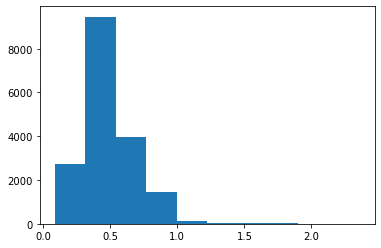

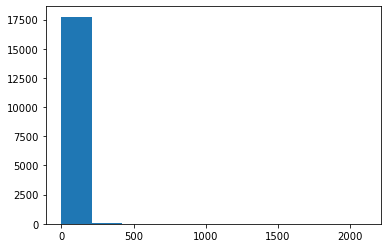

In [44]:
plt.hist(df_punks["tf-idf"])
plt.show()
# plt.hist(df_punks["mean_eth"])
# plt.show()

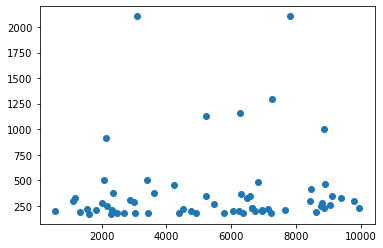

In [15]:
plt.scatter(df_sales_top1.punk_id, df_sales_top1.mean_eth)

In [50]:
all_data = df_sales_tf_idf[['mean_eth','punk_id', 'tf-idf_sum']]
top50 = df_sales_top50[['mean_eth','punk_id', 'tf-idf_sum']]
top20 = df_sales_top20[['mean_eth','punk_id', 'tf-idf_sum']]
top10 = df_sales_top10[['mean_eth','punk_id', 'tf-idf_sum']]
top5 = df_sales_top5[['mean_eth','punk_id', 'tf-idf_sum']]
top1 = df_sales_top1[['mean_eth','punk_id', 'tf-idf_sum']]

bottom5 = df_sales_bottom5[['mean_eth','punk_id', 'tf-idf_sum']]

In [33]:
all_data.to_csv('all_observable.csv', index=False)

In [36]:
top50.to_csv('top50_observable.csv', index=False)

In [37]:
top20.to_csv('top20_observable.csv', index=False)

In [41]:
top10.to_csv('top10_observable.csv', index=False)

In [47]:
top5.to_csv('top5_observable.csv', index=False)

In [27]:
top1.to_csv('top1_observable.csv', index=False)

In [51]:
bottom5.to_csv('bottom5_observable.csv', index=False)

In [48]:
# first we filtered on only those that were sold
# then we filtered on the top x%
# 80 percentile hits a mean_eth of 45.79 --> filter out anything less than 45
mean_sale.describe(percentiles=[0.05, 0.2,0.4,0.6,0.8, 0.9, 0.95, 0.99])

#df_sales_filtered.describe(percentiles=[0.2, 0.4, 0.6, 0.8])

,punk_id,mean_eth
count,6393.000000,6393.000000
mean,5334.129673,29.834085
std,2708.708702,61.512056
min,0.000000,0.000000
5%,1043.600000,0.140000
20%,2617.200000,1.000000
40%,4345.400000,10.869500
50%,5374.000000,17.225000
60%,6272.200000,23.545692
80%,8153.600000,45.790000


In [19]:
#new = df_punk_claimed.accessories_formatted.str.split(",", n = 7, expand = True)

In [61]:
df_punks

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,...,mean_eth,type_formatted,accessories_formatted,accessories_split,accessories_counts,type_counts,tf,idf,tf-idf,tf-idf_sum
0,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,0,,,...,9.193333,Female,"Green Eye Shadow,Earring,Blonde Bob",Green Eye Shadow,271.0,6243,0.333333,1.567031,0.522344,1.336318
1,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,0,,,...,9.193333,Female,"Green Eye Shadow,Earring,Blonde Bob",Earring,2459.0,6243,0.333333,0.609241,0.203080,1.336318
2,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,0,,,...,9.193333,Female,"Green Eye Shadow,Earring,Blonde Bob",Blonde Bob,147.0,6243,0.333333,1.832683,0.610894,1.336318
3,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,14,,,...,1.750000,Female,"Pipe,Pilot Helmet,Hot Lipstick",Pipe,317.0,6243,0.333333,1.498941,0.499647,1.641313
4,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,14,,,...,1.750000,Female,"Pipe,Pilot Helmet,Hot Lipstick",Pilot Helmet,54.0,6243,0.333333,2.267606,0.755869,1.641313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17852,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7523,,,...,8.000000,Alien,"Earring,Knitted Cap,Medical Mask",Knitted Cap,419.0,13,0.333333,1.377786,0.459262,1.247996
17853,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7523,,,...,8.000000,Alien,"Earring,Knitted Cap,Medical Mask",Medical Mask,175.0,13,0.333333,1.756962,0.585654,1.247996
17854,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7804,,,...,2106.000000,Alien,"Cap Forward,Pipe,Small Shades",Cap Forward,254.0,13,0.333333,1.595166,0.531722,1.505538
17855,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7804,,,...,2106.000000,Alien,"Cap Forward,Pipe,Small Shades",Pipe,317.0,13,0.333333,1.498941,0.499647,1.505538


In [78]:
df_counts

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,...,accessory_count,type_formatted,accessories_formatted,accessories_split,accessories_counts,type_counts,tf,idf,tf-idf,tf-idf_sum
0,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,0,,,...,3,Female,"Green Eye Shadow,Earring,Blonde Bob",Green Eye Shadow,271.0,6243,0.333333,1.567031,0.522344,1.336318
1,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,0,,,...,3,Female,"Green Eye Shadow,Earring,Blonde Bob",Earring,2459.0,6243,0.333333,0.609241,0.203080,1.336318
2,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,0,,,...,3,Female,"Green Eye Shadow,Earring,Blonde Bob",Blonde Bob,147.0,6243,0.333333,1.832683,0.610894,1.336318
3,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,2,,,...,1,Female,Wild Hair,Wild Hair,447.0,6243,1.000000,1.349692,1.349692,1.349692
4,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,5,,,...,3,Female,"Purple Eye Shadow,Half Shaved,Earring",Purple Eye Shadow,262.0,6243,0.333333,1.581699,0.527233,1.341208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27542,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7523,,,...,3,Alien,"Earring,Knitted Cap,Medical Mask",Knitted Cap,419.0,13,0.333333,1.377786,0.459262,1.247996
27543,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7523,,,...,3,Alien,"Earring,Knitted Cap,Medical Mask",Medical Mask,175.0,13,0.333333,1.756962,0.585654,1.247996
27544,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7804,,,...,3,Alien,"Cap Forward,Pipe,Small Shades",Cap Forward,254.0,13,0.333333,1.595166,0.531722,1.505538
27545,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7804,,,...,3,Alien,"Cap Forward,Pipe,Small Shades",Pipe,317.0,13,0.333333,1.498941,0.499647,1.505538


In [77]:
# df_counts contains necessary info for tableau for accessory and type counts
df_counts.to_csv('acc_type_counts.csv')

In [62]:
# save formatted data
df_punks.to_csv('cryptopunks_dashboard3.csv')

In [21]:
# save data
#with_avg_sale.to_csv('cryptopunks_dashboard.csv')

In [22]:
#acc_counts.to_csv('cryptopunks_acc_counts_dashboard.csv')